# Chapter 1: Numerical Algorithms
Based on the Matlab [files](http://www.siam.org/books/cs07/programs.zip) for the book *[A First Course in Numerical Methods](http://www.siam.org/books/cs07/)*, by Ascher and Greif.

Julia version by Michael P. Friedlander.

11 Sept 2016

In [1]:
using PyPlot

## Example 1.1: Stirling approximation
[Stirling's approximation](https://en.wikipedia.org/wiki/Stirling%27s_approximation) provides an inexpensive formula for computing approximations to factorials $n!$. This example illustrates the error (relative and absolute) of the formula for some values of $n$.

In [2]:
e = exp(1)
for n in 1:10
    Sn = sqrt(2pi*n)*((n/e)^n)  # the Stirling approximation.
    fact_n = factorial(n)

    abs_err = abs(Sn-fact_n)    # absolute error
    rel_err = abs_err/fact_n    # relative error

    @printf("%2i  %8d  %10.2e  %10.2e\n", n, fact_n, abs_err, rel_err );
end

 1         1    7.79e-02    7.79e-02
 2         2    8.10e-02    4.05e-02
 3         6    1.64e-01    2.73e-02
 4        24    4.94e-01    2.06e-02
 5       120    1.98e+00    1.65e-02
 6       720    9.92e+00    1.38e-02
 7      5040    5.96e+01    1.18e-02
 8     40320    4.18e+02    1.04e-02
 9    362880    3.34e+03    9.21e-03
10   3628800    3.01e+04    8.30e-03


## Examples 1.3-1.4: Discretization error
Record errors in the approximation of the derivative of $f(x)=sin(x)$ at the point $x_0=1.2$. The discretization error should satisfy
$$
\left| f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h} \right| \approx \frac{h}{2}|f''(x_0)|.
$$
Recall that for $f(x)=sin(x)$,
$$
f'(x) = cos(x) \quad\hbox{and}\quad f''(x) = sin(x).
$$

In [2]:
x0 = 1.2
f(x) = sin(x)
fp(x) = cos(x)
fpp(x) = sin(x)
errors = []; d_errors = []
hvals = logspace(0,-20,20)
for h in hvals
    err = abs( fp(x0) - (f(x0+h)-f(x0))/h  )
    d_err = (h/2) * abs(fpp(x0))
    @printf("%10.2e  %15.5e  %15.5e\n",h,err,d_err)
    push!(errors, err)
    push!(d_errors, d_err)
end

  1.00e+00      4.85900e-01      4.66020e-01
  8.86e-02      4.17299e-02      4.12831e-02
  7.85e-03      3.66084e-03      3.65713e-03
  6.95e-04      3.24003e-04      3.23973e-04
  6.16e-05      2.87000e-05      2.86997e-05
  5.46e-06      2.54240e-06      2.54241e-06
  4.83e-07      2.25176e-07      2.25224e-07
  4.28e-08      1.77398e-08      1.99518e-08
  3.79e-09      1.98678e-08      1.76747e-09
  3.36e-10      3.08487e-07      1.56574e-10
  2.98e-11      2.42281e-08      1.38704e-11
  2.64e-12      1.78393e-05      1.22873e-12
  2.34e-13      3.13985e-04      1.08849e-13
  2.07e-14      2.50511e-03      9.64259e-15
  1.83e-15      1.05786e-03      8.54205e-16
  1.62e-16      3.21371e-01      7.56712e-17
  1.44e-17      3.62358e-01      6.70346e-18
  1.27e-18      3.62358e-01      5.93837e-19
  1.13e-19      3.62358e-01      5.26061e-20
  1.00e-20      3.62358e-01      4.66020e-21


Plot the two errors.

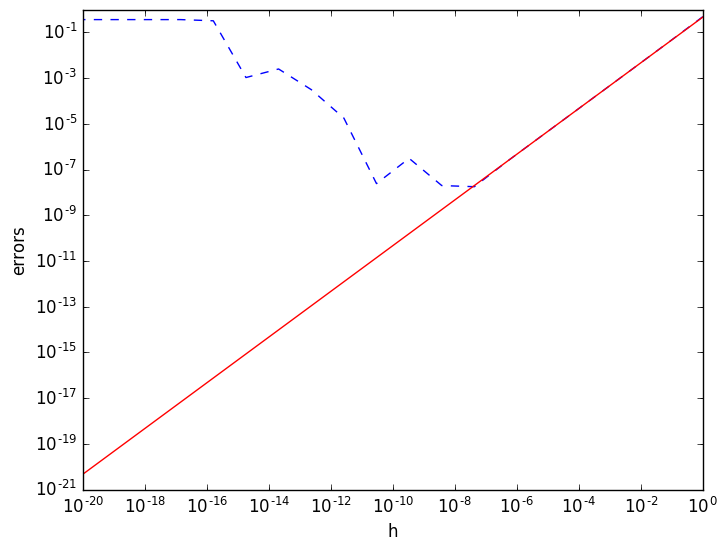

PyObject <matplotlib.text.Text object at 0x329eb2190>

In [18]:
loglog(hvals, errors,"b--", hvals, d_errors, "r-")
xlabel("h")
ylabel("errors")

## Example 1.5: Integration
Integrate recursively the integral
$$
  \int_0^1 \frac{x^n}{x+10} dx.
$$
This is an example of an *unstable* algorithm. We'll compare againt the approximation obtained using quadrature.

In [23]:
yp = log(11)-log(10)
for n = 1:30
    # Approximation via recursive approach.
    y = 1/n - 10yp
    yp = y
    
    # Approximation via quadrature. Note that `quadgk` returns a tuple; we only need the first element.
    z = quadgk( x->(x^n/(x+10)), 0, 1)[1] 
    
    @printf("%3i  %15.5e  %15.5e %10.2e\n",n,y,z,abs(y-z))
end

  1      4.68982e-02      4.68982e-02   9.16e-16
  2      3.10180e-02      3.10180e-02   9.17e-15
  3      2.31535e-02      2.31535e-02   9.17e-14
  4      1.84647e-02      1.84647e-02   9.17e-13
  5      1.53529e-02      1.53529e-02   9.17e-12
  6      1.31377e-02      1.31377e-02   9.17e-11
  7      1.14806e-02      1.14806e-02   9.17e-10
  8      1.01944e-02      1.01944e-02   9.17e-09
  9      9.16730e-03      9.16720e-03   9.17e-08
 10      8.32705e-03      8.32797e-03   9.17e-07
 11      7.63861e-03      7.62944e-03   9.17e-06
 12      6.94728e-03      7.03898e-03   9.17e-05
 13      7.45030e-03      6.53332e-03   9.17e-04
 14     -3.07447e-03      6.09542e-03   9.17e-03
 15      9.74113e-02      5.71251e-03   9.17e-02
 16     -9.11613e-01      5.37486e-03   9.17e-01
 17      9.17496e+00      5.07489e-03   9.17e+00
 18     -9.16940e+01      4.80663e-03   9.17e+01
 19      9.16993e+02      4.56530e-03   9.17e+02
 20     -9.16988e+03      4.34704e-03   9.17e+03
 21      9.16988e+04